# Visualizing Data in Python

## Plotting in Python: matplotlib

We can import data and collect data, but we rarely if ever present data in tables as we do in plots, so let's discuss basic plotting in Python with experimental data. For simplicity, we will assume we are starting with some nice, tabulated data in Python. Let's look at the following data, which tracks reactants and product concentrations for the hydrolysis of aspirin. [Data obtained online from here](https://saylordotorg.github.io/text_general-chemistry-principles-patterns-and-applications-v1.0/s18-02-reaction-rates-and-rate-laws.html)

```{figure} images/hydrolysis_aspirin.jpg
---
width: 600px
---
```


| Time (h) | [Aspirin] (M)          | [Salicylic Acid] (M)    |
| -------- | ---------------------- | ----------------------- |
| 0        | 5.55 × 10<sup>−3</sup> | 0                       |
| 2.0      | 5.51 × 10<sup>−3</sup> | 0.040 × 10<sup>−3</sup> |
| 5.0      | 5.45 × 10<sup>−3</sup> | 0.10 × 10<sup>−3</sup>  |
| 10       | 5.35 × 10<sup>−3</sup> | 0.20 × 10<sup>−3</sup>  |
| 20       | 5.15 × 10<sup>−3</sup> | 0.40 × 10<sup>−3</sup>  |
| 30       | 4.96 × 10<sup>−3</sup> | 0.59 × 10<sup>−3</sup>  |
| 40       | 4.78 × 10<sup>−3</sup> | 0.77 × 10<sup>−3</sup>  |
| 50       | 4.61 × 10<sup>−3</sup> | 0.94 × 10<sup>−3</sup>  |
| 100      | 3.83 × 10<sup>−3</sup> | 1.72 × 10<sup>−3</sup>  |
| 200      | 2.64 × 10<sup>−3</sup> | 2.91 × 10<sup>−3</sup>  |
| 300      | 1.82 × 10<sup>−3</sup> | 3.73 × 10<sup>−3</sup>  |


First, as always when coding, we start by importing our packages and we will import our data from the following file

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

time, conc_aspirin, conc_acid = np.genfromtxt('data/aspirin_data.txt',delimiter=',',skip_header=1,unpack=True)

Now what we imported before was matplotlib.pyplot and labelled it plt. Therefore, we can use all the built-in functionality of the package matplotlib.pyplot easily.

First and foremost, we can call **plt.plot(x_array,y_array)** to do a quick and dirty plot. We can do this as many times as we want in a single cell to plot multiple arrays on a single graph

In [2]:
# plotting data
plt.plot(time,conc_aspirin)
plt.plot(time,conc_acid)

Alternatively we can use `plt.scatter` to produce a scatterplot instead.

In [3]:
# plotting data
plt.scatter(time,conc_aspirin)
plt.scatter(time,conc_acid)

And thats all we need to do to plot our data. In day to day research, generating plots like this done all the time to check work, especially post-processing. What's great about matplotlib is it will often automatically generate limits, ranges, and tick positions of interest for us.

Obviously though, we are missing many visual elements that do not communicate what our data is presenting well. we can add those as below by adding to the above code

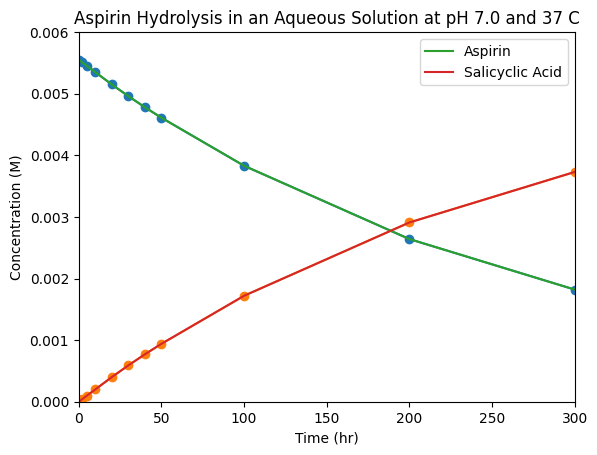

In [4]:
# plot our data and label
plt.plot(time,conc_aspirin,label='Aspirin')
plt.plot(time,conc_acid,label='Salicyclic Acid')
# label x and y axis
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (M)')
# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0,right=300)
plt.ylim(bottom=0,top=0.006)
# create legend
plt.legend()
plt.show()

Lastly we are also not restricted to line graphs, and there are countless options for visual elements to add/modify such as colors, linesizes, linestyles, etc. More thorough documentation can be found online [here on the official matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), but as an example we can look at below:

In [5]:
# plotting data, but with more options
plt.plot(time,conc_aspirin,color='red',linestyle=':',linewidth=3,label='Aspirin') # linestyle is the type of line, linewidth is the thickness of the line
plt.plot(time,conc_acid,color='blue',linestyle='--',linewidth=2,label='Salicyclic Acid')

# we can also do a scatterplot to highlight the data points
plt.scatter(time,conc_aspirin,marker='*',color='black',s=100) # marker is the shape of the data point, s is the size
plt.scatter(time,conc_acid,marker='o',color='blue')

# label x and y axis
plt.xlabel('time (s)')
plt.ylabel('concentration (M)')
# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0,right=300)
# generate legend
plt.legend()

## Annotating your plot: plt.annotate()

`````{admonition} For CHM223 students
:class: important
This subsection is relevant for your assignment!
`````

Additionally, Python allows us to *programatically* annotate our plots. This means that we can use Python to automatically add text to our plots. This is useful if we want to add a label to a specific point on our plot, or if we want to add a label to a specific line on our plot. We can do this using the `plt.annotate()` function. 

This function takes three arguments: the text we want to add, the x-coordinate of the point we want to annotate, and the y-coordinate of the point we want to annotate. We can also specify the x and y coordinates of the text we want to add if we wish to offset it a bit, and draw an arrow even! It looks as follows

`plt.annotate('text goes here',xy=(xvalue,yvalue),xytext=(xfortext,yfortext),color='color')`

For example, if we want to label the point where the first data points where the concentrations cross over and add the text "more acid starting here" to the point (200,0.004) on our plot, we can do so using the following code:

In [6]:
# plotting data, but with more options
plt.plot(time,conc_aspirin,color='red',linestyle=':',linewidth=3,label='Aspirin') # linestyle is the type of line, linewidth is the thickness of the line
plt.plot(time,conc_acid,color='blue',linestyle='--',linewidth=2,label='Salicyclic Acid')

# we can also do a scatterplot to highlight the data points
plt.scatter(time,conc_aspirin,marker='*',color='black',s=100) # marker is the shape of the data point, s is the size
plt.scatter(time,conc_acid,marker='o',color='blue')

# label x and y axis
plt.xlabel('time (s)')
plt.ylabel('concentration (M)')
# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0,right=300)
# generate legend
plt.legend()

# annotate the plot with text
#xy is the position of the data point, xytext is the position of the text.
plt.annotate('Aspirin',xy=(100,0.005),xytext=(100,0.004),color='red')
plt.annotate('Salicyclic Acid',xy=(100,0.0005),xytext=(100,0.001),color='blue')
# annotate the first data points after crossing over
plt.annotate('More acid starting here',xy=(200,0.003),xytext=(200,0.004),arrowprops=dict(facecolor='black')) 
# arrow will point from text position xytext to data point xy by adding arrowprop part!

Text(200, 0.004, 'More acid starting here')

This is especially useful with defining regions in our graph, or also when used in tandem with automatically locating certain positions, extrema, or values in our data.

## Alternative scale plots: log, inverse, etc

matplotlib has built in scalings based on how you would like to analyze your data. For instance, we typically check a few types of plots to determine the order of our reaction. For first order, we are interested in the logarithm of our concentration data. We can easily visualize this using the `plt.yscale()` command as follows:

In [7]:
# plot our data and label
plt.plot(time, conc_aspirin, label='Aspirin')
plt.plot(time, conc_acid, label='Salicyclic Acid')

# label x and y axis
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (M)')

# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0, right=300)

# set y-axis to logarithmic scale
plt.yscale('log')

# create legend
plt.legend()


Rather than taking the log of the data itself, this creates log-spaced tick marks on our plot which are much nicer to look at.

From this plot, we can see that the aspirin does appear to obey a first order rate law. The salicyclic acid data in this plot behaves strangely because of the starting point of zero concentration which doesn't work properly on a log scale plot. Beyond that though, we see it does not appear linear, implying further dependence. This is true, as the salicyclic acid rate of production is also dependent on pH.

Another option for plotting is in setting limits, we can reverse the order to go in descending order. This is frequently useful for presenting data from instruments which record from highest to lowest energy. In the example above, we could do this as follows

In [8]:
# plot our data and label
plt.plot(time, conc_aspirin, label='Aspirin')
plt.plot(time, conc_acid, label='Salicyclic Acid')

# label x and y axis
plt.xlabel('Time (hr)')
plt.ylabel('Concentration (M)')

# create plot title
plt.title('Aspirin Hydrolysis in an Aqueous Solution at pH 7.0 and 37 C')

# set x and y axis limits
plt.xlim(left=0, right=300)

# reverse the x-axis
plt.xlim(300,0)

# create legend
plt.legend()
